In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal
import random
import pickle
from numpy import linalg as LA

In [56]:
np.random.seed()

N = 10000;
samples = []
labels = []
priors = [0.8, 0.2]

#Class 1
size_1 = 0
mean_1 = np.array([-0.1, 0]).T
cov_1 = np.array([[1, -0.9], [-0.9, 1]])

#Class 2
size_2 = 0;
mean_2 = np.array([0.1, 0]).T
cov_2 = np.array([[1, 0.9], [0.9, 1]])

In [57]:
#Generate Samples
for i in range(N):
    u = random.random()
    if u <= priors[0]:
        labels.append(0)
        size_1 += 1
    else:
        labels.append(1)
        size_2 += 1


x1 = np.random.multivariate_normal(mean_1, cov_1, size_1)
x2 = np.random.multivariate_normal(mean_2, cov_2, size_2)

iter1 = iter(x1)
iter2 = iter(x2)
for k in range(len(labels)):
    if labels[k] == 0:
        n_value = next(iter1)
        samples.append( np.append( n_value, labels[k]) )
    else:
        n_value = next(iter2)
        samples.append( np.append( n_value, labels[k]) )
        
samples = np.array(samples).T
np.shape(samples)

(3, 10000)

In [58]:
#Save samples
pickle.dump( samples, open( "samples.p", "wb" ) )

In [59]:
#Load samples
samples = pickle.load( open("samples.p", "rb") )

In [60]:
"""
    Minimum Expected Risk Classification
"""

#Likelihood functions

pdf1 = multivariate_normal.pdf(samples[:2].T, mean=mean_1, cov=cov_1)
pdf2 = multivariate_normal.pdf(samples[:2].T, mean=mean_2, cov=cov_2)

#Likelihood ratio test
loss = np.array([[0, 1], [1, 0]])
gamma =  ( (loss[1, 1] - loss[0, 1])/ (loss[0, 0]-loss[1, 0] ) ) * ( priors[0]/priors[1] )


x = samples[:2]
decisions = []
class1, class2 = 0, 0

for i in range(N):
    if (pdf1[i] / pdf2[i]) > gamma:
        decisions.append(0) #Choose class 1
        class1 += 1
    else:
        decisions.append(1)
        class2 += 1

decisions = np.array(decisions)

decisions = []
tp, fp, tn, fn = 0, 0, 0, 0
tpr, fpr = [], []
total_errors = []
for x in np.arange(0, 200, 0.1):
    error = []
    for i in range(N):
        if (pdf1[i] / pdf2[i]) > x:
            #Choose class 1
            decisions.append(0) 
            error.append( pdf2[i] )
            class1 += 1
            if(labels[i] == 0): #D = 1, C = 1 true positive
                tp += 1
            else:               #D = 1, C = 2 false positive
                fp += 1
        else:
            #Choose class 2
            decisions.append(1)
            error.append( pdf1[i] )
            
            class2 += 1
            if(labels[i] == 1): #D = 2, C = 2 true negative
                tn += 1
            else:               #D = 2, C = 1 false negative
                fn += 1
    
    total_errors.append( sum(error) )
       
    #true positive rate: TP / (TP + FN)
    tpr.append( tp / (tp + fn) )
    #false positive rate: FP / (FP + TN) 
    fpr.append(fp / (fp + tn ) )

minimum_gamma = total_errors.index( min(total_errors) )

In [61]:
print( min(total_errors) / 10000) 

0.06435694247604419


643.569424760442


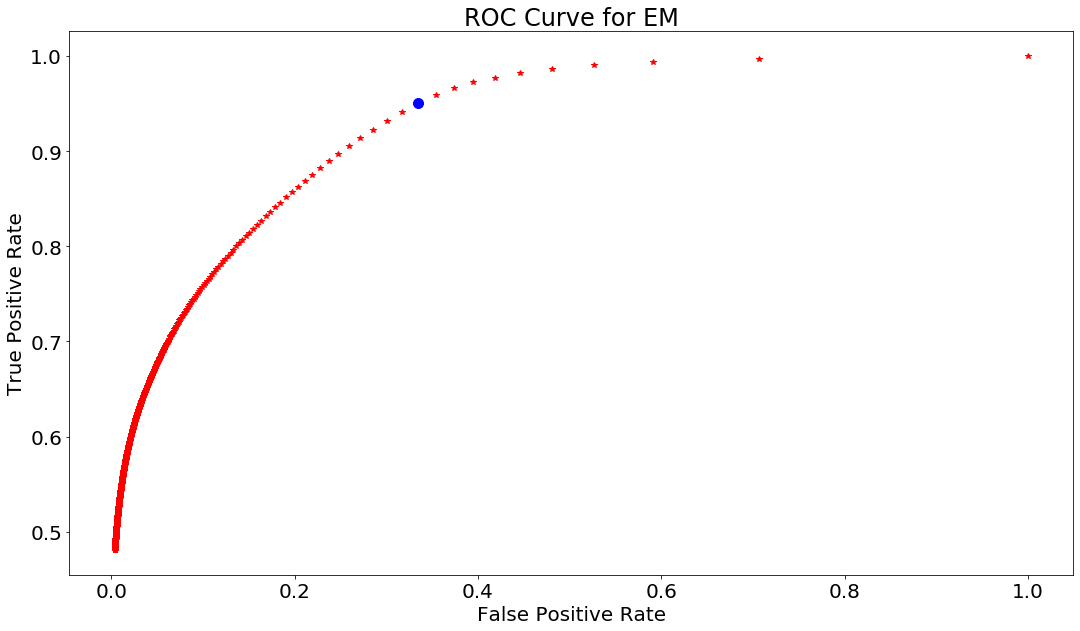

In [62]:
print(min(total_errors))

plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 20})
plt.title('ROC Curve for EM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, 'r*')
plt.plot(fpr[minimum_gamma], tpr[minimum_gamma], 'bo', ms=10)
plt.savefig("ROC_Curve_EM.png")

In [63]:
"""
    Naive Bayes Classifier
"""

#Likelihood functions

i_matrix = [[1, 0], [0, 1]]
pdf1 = multivariate_normal.pdf(samples[:2].T, mean=mean_1, cov=i_matrix)
pdf2 = multivariate_normal.pdf(samples[:2].T, mean=mean_2, cov=i_matrix)

#Likelihood ratio test
loss = np.array([[0, 1], [1, 0]])
gamma =  ( (loss[1, 1] - loss[0, 1])/ (loss[0, 0]-loss[1, 0] ) ) * ( priors[0]/priors[1] )

x = samples[:2]
decisions = []
class1, class2 = 0, 0

for i in range(N):
    if ( (pdf1[i] * priors[0]) / (pdf2[i] * priors[1]) ) > gamma:
        decisions.append(0) #Choose class 1
        class1 += 1
    else:
        decisions.append(1)
        class2 += 1

decisions = np.array(decisions)

decisions = []
tp, fp, tn, fn = 0, 0, 0, 0
tpr, fpr = [], []
total_errors = []
for x in np.arange(0, 100, 0.1):
    error = []
    for i in range(N):
        if (pdf1[i] / pdf2[i]) > x:
            #Choose class 1
            decisions.append(0) 
            error.append( pdf2[i] )
            class1 += 1
            if(labels[i] == 0): #D = 1, C = 1 true positive
                tp += 1
            else:               #D = 1, C = 2 false positive
                fp += 1
        else:
            #Choose class 2
            decisions.append(1)
            error.append( pdf1[i] )
            
            class2 += 1
            if(labels[i] == 1): #D = 2, C = 2 true negative
                tn += 1
            else:               #D = 2, C = 1 false negative
                fn += 1
    
    total_errors.append( sum(error) )
       
    #true positive rate: TP / (TP + FN)
    tpr.append(tp / (tp + fn) )
    #false positive rate: FP / (FP + TN) 
    fpr.append(fp / (fp + tn ) )

minimum_gamma = total_errors.index( min(total_errors) )
print(min(total_errors))
print( min(total_errors) / 10000) 

836.0097289719657
0.08360097289719658


10


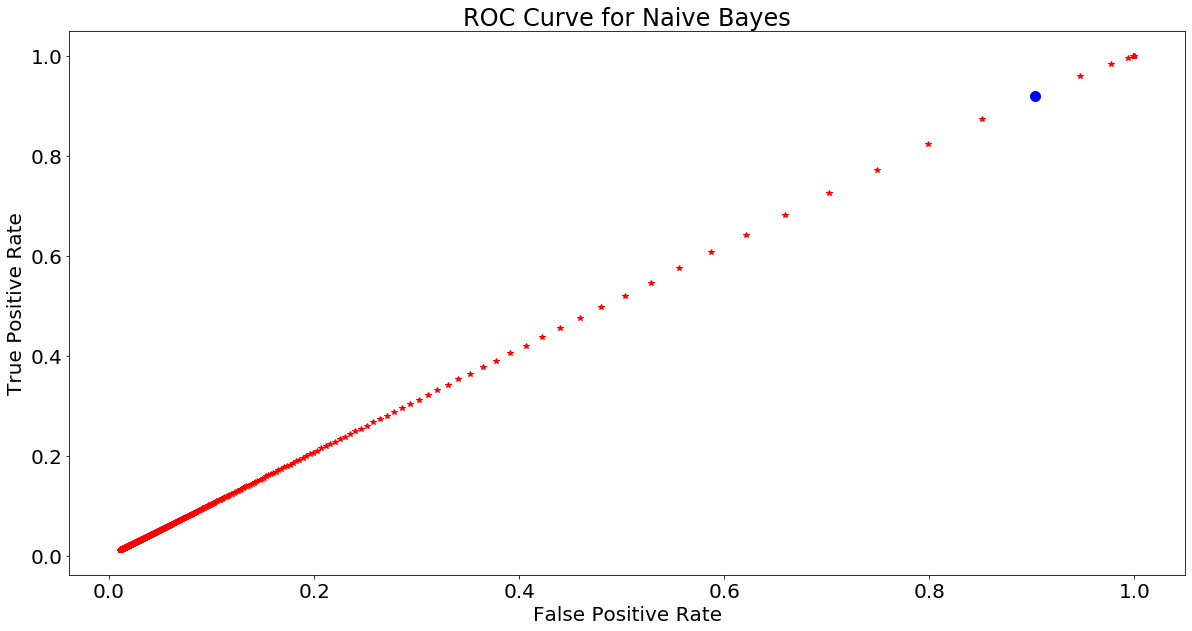

In [64]:
print(minimum_gamma)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, 'r*')
#plt.set_markevery(5)
plt.plot(fpr[minimum_gamma], tpr[minimum_gamma], 'bo', ms=10)
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("ROC_Curve_NB.png")

In [65]:
"""
    Fisher LDA Classifier
    
"""

f_mu1 = np.mean(x1, axis=0)
f_mu2 = np.mean(x2, axis=0)

#print( (f_mu1 - f_mu2) )
s1 = np.cov(x1.T)
s2 = np.cov(x2.T)

#Sb = np.transpose((f_mu1 - f_mu2)) * (f_mu1 - f_mu2) 
Sb = np.outer( (f_mu1-f_mu2), (f_mu1-f_mu2))

#print(Sb)
Sw = s1 + s2

#[V, D] = eig = LA.eig( LA.inv(Sw) * Sb )

w = np.dot( LA.inv(Sw), (f_mu1 - f_mu2))
w = np.array([w])
#print( samples[0:2:] )
#print(w.T, np.shape(w.T))
y = np.inner(w, samples[0:2:].T)
#y1 = np.inner(np.transpose(w), (samples[2,:]))
#y2 = np.inner(np.transpose(w), samples[2,])

#print(y1, y2)
print(y)

[[-0.07263599 -0.01458543 -0.10835878 ... -0.0742542  -0.07805737
  -0.13672194]]


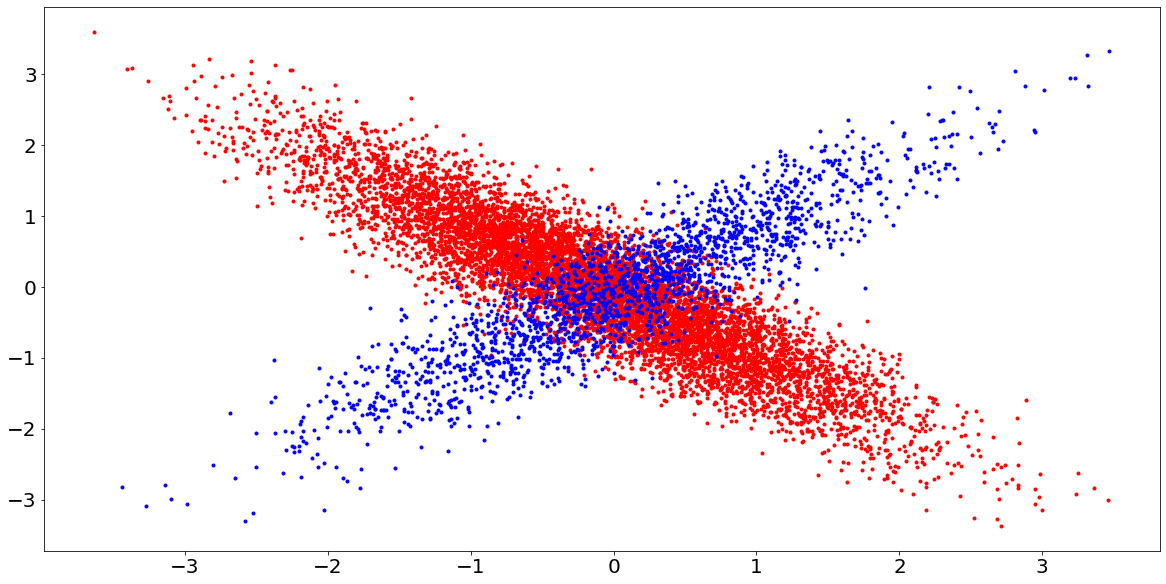

In [66]:

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})

plt.plot(x1[:, 0], x1[:, 1], 'r.')
plt.plot(x2[:, 0], x2[:, 1], 'b.')
#plt.figure(figsize=(20,10))
#plt.plot(y, np.zeros((len(x1), 1)), 'r*')
#plt.plot(y2, np.zeros((len(x2), 1)), 'b.')




In [67]:

decisions = []
tp, fp, tn, fn = 0, 0, 0, 0
tpr, fpr = [], []
total_errors = []
for x in np.arange(-50, 50, 0.1):
    error = []
    for i in range(N):
        if (y[0][i]) > x:
            #Choose class 1
            decisions.append(0) 
            error.append( pdf2[i] )
            class1 += 1
            if(labels[i] == 0): #D = 1, C = 1 true positive
                tp += 1
            else:               #D = 1, C = 2 false positive
                fp += 1
        else:
            #Choose class 2
            decisions.append(1)
            error.append( pdf1[i] )
            
            class2 += 1
            if(labels[i] == 1): #D = 2, C = 2 true negative
                tn += 1
            else:               #D = 2, C = 1 false negative
                fn += 1
    
    total_errors.append( sum(error) )
       
    #true positive rate: TP / (TP + FN)
    tpr.append(tp / (tp + fn) )
    #false positive rate: FP / (FP + TN) 
    fpr.append(fp / (fp + tn ) )



In [68]:
minimum_gamma = total_errors.index( min(total_errors) )
print(min(total_errors))

print(minimum_gamma)

print( min(total_errors) / 10000) 

836.257631985725
500
0.0836257631985725


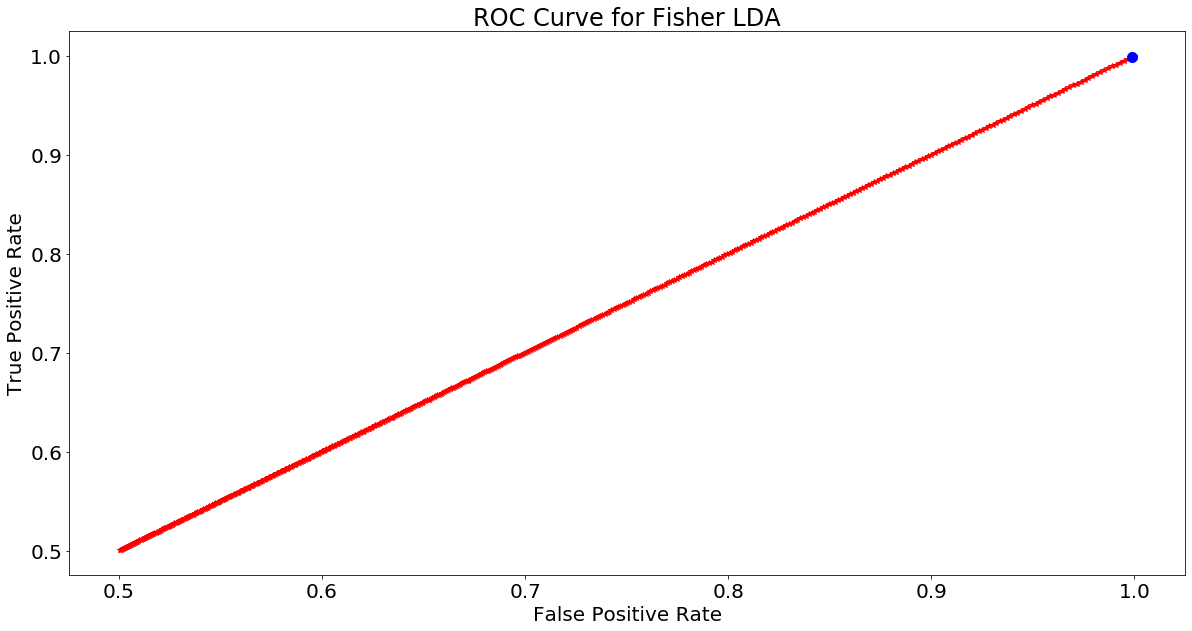

In [69]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, 'r-*')
#plt.set_markevery(5)
plt.plot(fpr[minimum_gamma], tpr[minimum_gamma], 'bo', ms=10)
plt.title('ROC Curve for Fisher LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("ROC_Curve_FLDA.png")